this function takes in a array 
[[m1, x1 coordinate, y1 coordinate, z1 coordinate, x1 velocity, y1 velocity, z1 velocity],
 [m2, x2 coordinate, y2 coordinate, z2 coordinate, x2 velocity, y2 velocity, z2 velocity],
 ...]
 
 n is number of particle, which equals to length of the array 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
# this function update the coordinates and velocities of all particles 
def update_particles(particles,t):
    G=1
    n=len(particles)
    mass=np.array([particles[i,0] for i in range(n)])
    coordinates=np.array([particles[i,1:4] for i in range(n)])
    velocity=np.array([particles[i,4:7] for i in range(n)])
    # calculate acceleration when looking at interaction between the mth and nth particle 
    def acceleration_between_2_points(m,n):
        return mass[m]*(coordinates[n]-coordinates[m])/(np.sqrt(sum((coordinates[m]-coordinates[n])**2)))**3

    # calculate acceleration for the mth particle taking all other particles into consideration 
    def get_acceleration(m):
        other_indices = list(range(n))
        other_indices.remove(m)
        acceleration=np.zeros((3))
        for i in other_indices:
            acceleration += acceleration_between_2_points(m,i)
        return acceleration 

    # generate array storig acceleration 
    acceleration_array=np.array([get_acceleration(i) for i in range(n)])

    # generate array storing change in velocity 
    final_velocity_array=velocity+acceleration_array*t
    
    # generate array storing displacement 
    displacement_array=velocity*t+0.5*acceleration_array*t**2
    
    # update coordinates 
    particles[:,1:4] += displacement_array

    # update velocity 
    particles[:,4:7] = final_velocity_array 
    
    # return the updated particles 
    return particles 


def plot_n_body(particles, accuracy, time):
# particles: a 2D list storing all the infomation of the particles 
# accuracy: delta t
# time: total length of time that pass 
    data_list=[]
    n=len(particles)
    iteration_no=int(time/accuracy)

    # 1: data generation, expected out put is data_list, a 3D array 
    for i in range(iteration_no):
        # 1.1: stroing particles information 
        data_list.append(particles[:,1:4].copy())
        # 1.2: update particles information 
        particles=update_particles(particles, accuracy)
    data_list=np.array(data_list)

    # 2: plotting 
    ax = plt.axes(projection='3d')
    for i in range(n):
        x=data_list[:,i,0]
        y=data_list[:,i,1]
        z=data_list[:,i,2]
        ax.plot3D(x, y, z)
    plt.show()

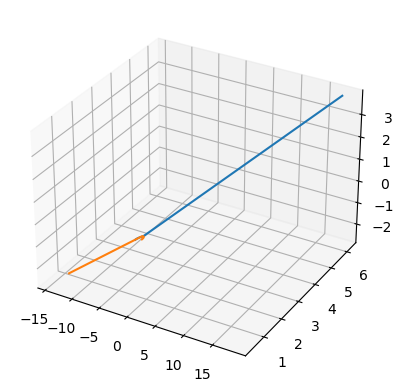

In [2]:
particles=np.array([[1,0.3,0.4,0.3,0.1,0.6,0.1],
                    [1,0.4,0.7,0.1,0.8,0.9,0.1],
                   ])
plot_n_body(particles, 0.01, 4)